Team members:

- José Ricardo Munguía Marín A01795660
- Alberto Campos Hernandez A01795645
- Martin Acevedo Pacheco A01794756
- Luis Alejandro Juarez Rodriguez A01795463
- David Alejandro Gutiérrez Valencia A01027771

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/MNA/Machine Learning'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/MNA/Machine Learning


In [3]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = '/content/drive/MyDrive/Colab Notebooks/MNA/Machine Learning/glove_embeddings/glove.6B.50d.txt'
emb_dim = 50

In [46]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    """
    Reading GloVe embeddings from the file and creating a dictionary with words as keys
    and their corresponding embedding vectors as values.
    """
    embeddings_dict = {}
    emb_dim = 50  # Fixed dimension based on the GloVe file being used (50d embeddings)

    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.strip().split()
            if len(values) != emb_dim + 1:
                continue  # Skip malformed lines

            word = values[0]
            vector = np.array(values[1:], dtype=np.float32)

            if word:  # Ensure the word is not empty
                embeddings_dict[word] = vector

    print(f"Loaded {len(embeddings_dict)} valid word embeddings.")
    return embeddings_dict




In [47]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

Loaded 400000 valid word embeddings.


In [48]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

In [49]:
# Check the first few items in the embeddings dictionary
for word, vector in list(embeddings_dict.items())[:5]:
    print(f"Word: {word}, Vector Length: {len(vector)}, Vector Sample: {vector[:5]}")


Word: the, Vector Length: 50, Vector Sample: [ 0.418    0.24968 -0.41242  0.1217   0.34527]
Word: ,, Vector Length: 50, Vector Sample: [ 0.013441  0.23682  -0.16899   0.40951   0.63812 ]
Word: ., Vector Length: 50, Vector Sample: [ 0.15164  0.30177 -0.16763  0.17684  0.31719]
Word: of, Vector Length: 50, Vector Sample: [ 0.70853  0.57088 -0.4716   0.18048  0.54449]
Word: to, Vector Length: 50, Vector Sample: [ 0.68047  -0.039263  0.30186  -0.17792   0.42962 ]


#### See some embeddings

In [50]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [51]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [52]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA):
    """
    Plots the embeddings of the specified words using PCA or t-SNE for dimensionality reduction.

    Parameters:
    - emb_path: Path to the serialized embeddings dictionary.
    - words2show: List of words to visualize.
    - emb_dim: Dimensionality of the embeddings.
    - embeddings_dict: Dictionary of word embeddings.
    - func: Dimensionality reduction function (PCA or t-SNE).
    """
    # Filter words that are present in the embeddings dictionary
    words = [word for word in words2show if word in embeddings_dict]
    vectors = np.array([embeddings_dict[word] for word in words])

    # Choose the dimensionality reduction method
    if func == PCA:
        reducer = PCA(n_components=2)
        method_name = "PCA"
    elif func == TSNE:
        reducer = TSNE(n_components=2, perplexity=30, max_iter=500, random_state=42)
        method_name = "t-SNE"
    else:
        raise ValueError("Unsupported dimensionality reduction method. Use PCA or TSNE.")

    # Apply dimensionality reduction
    reduced_vectors = reducer.fit_transform(vectors)

    # Plot the embeddings
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

    # Annotate points with the corresponding words
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)

    plt.title(f"Word Embeddings Visualization using {method_name}")
    plt.xlabel(f"{method_name} Component 1")
    plt.ylabel(f"{method_name} Component 2")
    plt.grid(True)
    plt.show()



In [53]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


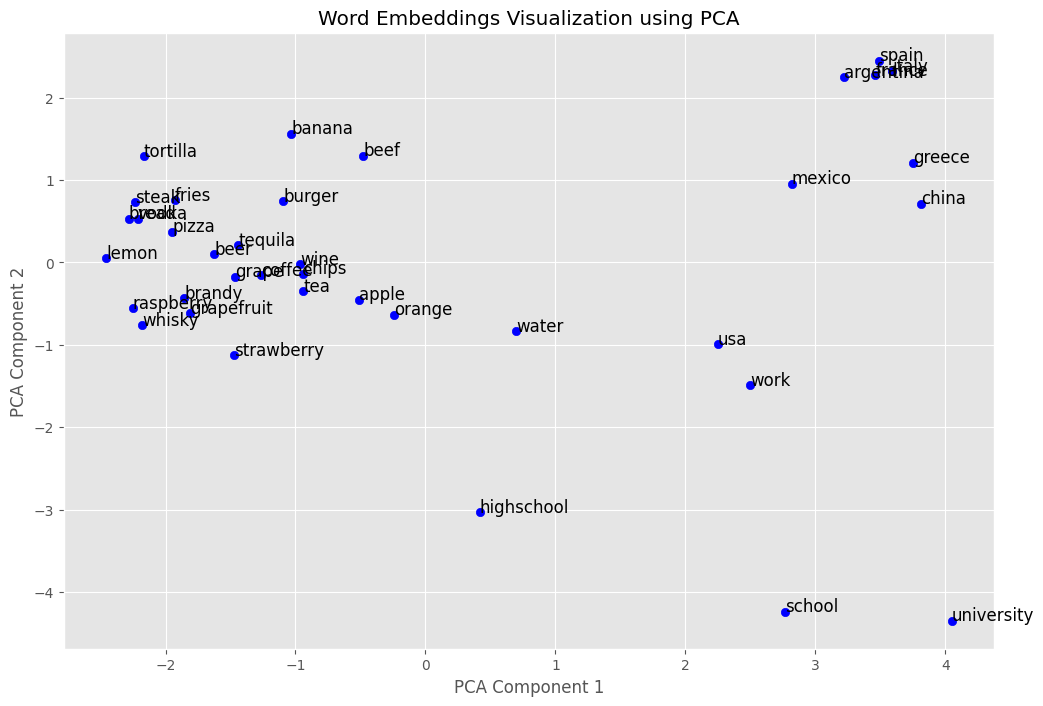

In [54]:
#
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

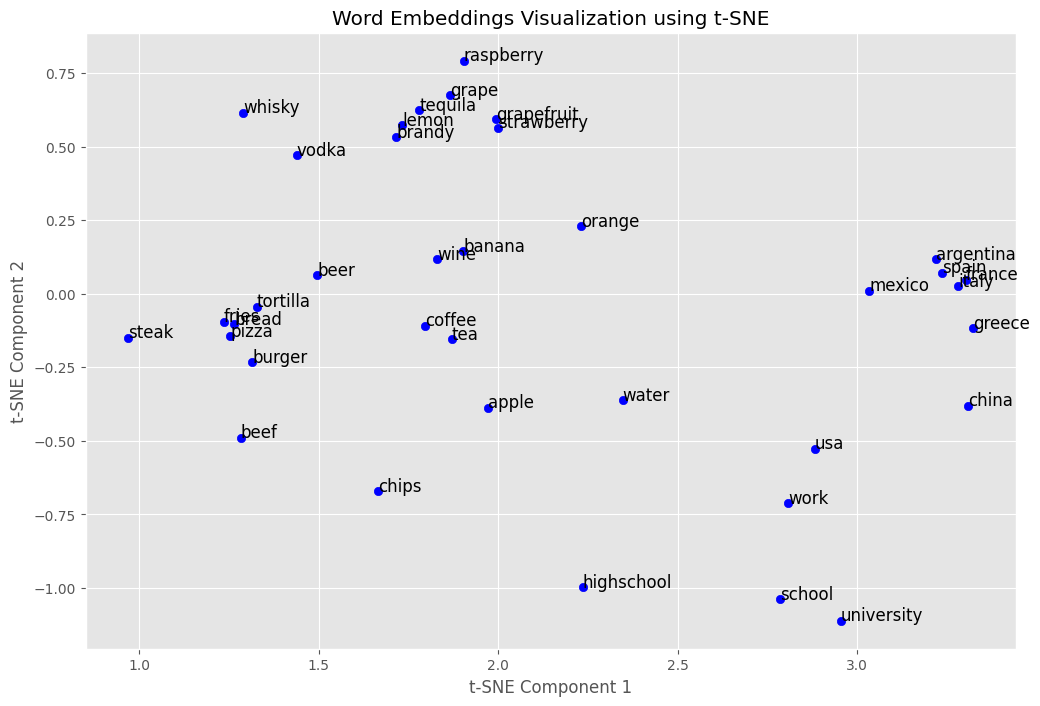

In [55]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, func = TSNE)


### Let us compute analogies

In [56]:
def analogy(word1, word2, word3, embeddings_dict, top_n=5):
    """
   word1 is to word2 as word3 is to ____?

    Parameters:
    - word1, word2, word3: The words in the analogy.
    - embeddings_dict: Dictionary of word embeddings.
    - top_n: Number of closest words to return.

    Returns:
    - List of top_n words closest to the given word.
    """
    # Check if all words are in the embeddings dictionary
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        print("One or more words are not in the embeddings dictionary.")
        return []

    # Compute the analogy: word2 - word1 + word3
    vec1 = embeddings_dict[word1]
    vec2 = embeddings_dict[word2]
    vec3 = embeddings_dict[word3]
    analogy_vector = vec2 - vec1 + vec3

    # Find the most similar words to the analogy
    similarities = {}
    for word, vector in embeddings_dict.items():
        if word not in {word1, word2, word3}:  # Avoid using the original words
            cosine_sim = np.dot(analogy_vector, vector) / (norm(analogy_vector) * norm(vector))
            similarities[word] = cosine_sim

    # Sort by similarity and return the top_n words
    sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return [word for word, score in sorted_words[:top_n]]



In [57]:
analogy('man', 'king', 'woman', embeddings_dict)

['queen', 'daughter', 'prince', 'throne', 'princess']

In [58]:
analogy('man', 'king', 'woman', embeddings_dict, 1)

['queen']

In [62]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Finds the top_n most similar words to the given word based on similarity.

    Parameters:
    - word: The input word to find similar words for.
    - embeddings_dict: Dictionary of word embeddings.
    - top_n: Number of most similar words to return.

    Returns:
    - List of tuples (word, similarity) for the top_n most similar words.
    """
    if word not in embeddings_dict:
        print(f"The word '{word}' is not in the embeddings dictionary.")
        return []

    word_vector = embeddings_dict[word]
    similarities = {}

    for w, vec in embeddings_dict.items():
        if w != word:
            similarity = np.dot(word_vector, vec) / (norm(word_vector) * norm(vec))
            similarities[w] = similarity

    # Sort by similarity and return the top_n most similar words
    return sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:top_n]


In [63]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [64]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
